# Display PIL images

In [29]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import numpy
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

In [15]:
def imshow(image, ax=None, title=None):
    """ Imshow for Tensor. Created by Udacity
        Parameter:
        image: tensor [3, row_pixels, col_pixels]"""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

In [67]:
def crop_image(img, size):
    """ Crop a PIL image at the center sizeXsize. The PIL modul method .crop() needs to know the margins.
        Parameters:
        ============
        img:     PIL image object
        size:    int crop size
        returns: PIL image object
    """
    left_margin = (img.width-224) / 2    # Find the extra horizontal pixels and divide by two
    bottom_margin = (img.height-224) / 2 # Find the extra vertical pixels and divide by two
    right_margin = left_margin + 224
    top_margin = bottom_margin + 224
    img = img.crop((left_margin, bottom_margin, right_margin, top_margin))
    return img

In [14]:
import os
print(os.getcwd())
print(os.listdir())

C:\Users\Hugo Sarrazin\OneDrive - McKinsey & Company\Documents\GitHub\Python-examples\UD\Section2-Intro_to_Pytorch
['.ipynb_checkpoints', 'intro-to-pytorch', 'jpg', 'Lesson_2_Implementing_gradient_descent', 'Machine Learning - Introduction with PyTorch - Udacity - installation.pdf', 'Untitled.ipynb']


In [36]:
image_path = 'jpg/image_00021.jpg'
img = Image.open(image_path)

In [76]:
def process_image(img):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model.
        Paremeters:
        ============
        img: single PIL image object
        returns: tensor of the image [3, width, height]
    '''
    # TODO: Process a PIL image for use in a PyTorch model
    LARGE_NUMBER = 1000000
    
    # Resie the image to the shortest side of 256. Used thumbnail since it preserves aspect ratio
    if img.size[0] > img.size[1]:
        img.thumbnail((LARGE_NUMBER, 256))
    else:
        img.thumbnail((256, LARGE_NUMBER))
                      
    img = crop_image(img, 224)  # Call utility function
    
    # These are the ImageNet normalizing mean and std
    mean = np.array([0.485, 0.456, 0.406]) 
    std = np.array([0.229, 0.224, 0.225])  
    
    # Create a transformation that converts PIL to Tensor and normalizes the info
    image_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean, std)])
    pil_to_tensor = image_transform(img)

    return pil_to_tensor

In [77]:
process_img = process_image(img)
print(f"{type(process_img)}")

<class 'torch.Tensor'>


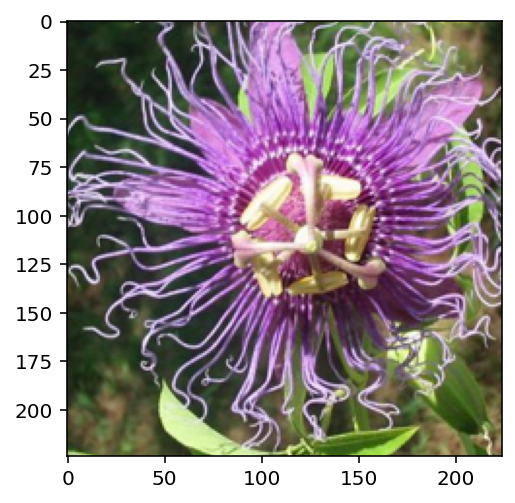

In [78]:
imshow(process_img)